In [31]:
from riotwatcher import LolWatcher, ApiError
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import kmeans_plusplus, KMeans
import numpy as np
from sklearn.metrics.cluster import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from collections import Counter, defaultdict
from yellowbrick.cluster import KElbowVisualizer

In [32]:
df = pd.read_csv("../DataExtracted/ElyoyaDataV2.csv")

In [33]:
df.drop(df[df['gameId'] == "EUW1_6166247020"].index, inplace = True)
df.drop(df[df['gameId'] == "EUW1_6166180735"].index, inplace = True)

In [34]:
df.drop(df[(df['coordinate_x'] <= 6000) & (df["coordinate_y"] <= 6000)].index, inplace = True)
df.drop(df[(df['coordinate_x'] >= 10500) & (df["coordinate_y"] >= 10500)].index, inplace = True)
df

,gameId,timestamp,coordinate_x,coordinate_y,team,won
1,EUW1_6176366691,1.000250,5633,9332,Blue,True
2,EUW1_6176366691,2.000750,8149,2265,Blue,True
3,EUW1_6176366691,3.001350,11532,4753,Blue,True
4,EUW1_6176366691,4.001617,11454,3261,Blue,True
5,EUW1_6176366691,5.001633,1232,13514,Blue,True
...,...,...,...,...,...,...
2005,EUW1_6151765282,27.007400,7572,12304,Red,False
2006,EUW1_6151765282,28.007417,10665,10235,Red,False
2007,EUW1_6151765282,29.007850,9714,5255,Red,False
2008,EUW1_6151765282,30.007983,7293,10934,Red,False


In [35]:
def drawSillouette(X, labels, header="" ):
    y_lower =10
    clusters=list(set(labels))
    n_clusters=len(clusters)

    fig = plt.figure(figsize=(10,8))
    ax1 = plt.gca()
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters) * 3+ y_lower])
    sil_avg = silhouette_score(X, labels)
    silhouette_values = silhouette_samples(X, labels)
    for i,c in enumerate(clusters):
        cs_values = silhouette_values[labels == c]
        cs_values.sort()
        size_ci = cs_values.shape[0]
        y_upper = y_lower + size_ci
        color = np.array(["blueviolet", "yellow", "lime", "crimson"])[i] #
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cs_values, facecolor=color, edgecolor="k", alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_ci, str(c))
        y_lower = y_upper + 3  # 10 for the 0 samples
    ax1.set_title("Silhouette plot "+ header)
    ax1.set_xlabel("Silhouette coefficient")
    ax1.set_ylabel("Clusters")
    ax1.axvline(x=sil_avg, c="r", linestyle="--")

    ax1.set_yticks([]) 
    plt.show()

In [36]:
def clustering(df, scores = 0, bb = 0, bt = 0, rb = 0, rt = 0):
    #centroids = np.array([[8250, 4250], [4000, 8750],[12000, 7500], [7750, 12000]])
    c1_victory = 0
    c1_defeat = 0
    c2_victory = 0
    c2_defeat = 0
    nc = df.shape[1]
    df_array = df.values
    X = df_array[:, 2:4]
    y = df_array[:, 5]
    kms = KMeans(n_clusters=2, random_state=0).fit(X)
    label = kms.fit_predict(X)
    
    #---------------
    #plot clusters
    centroids2 = kms.cluster_centers_
    
    u_labels = np.unique(label)
    img = plt.imread("../map11.png")
    fig, ax = plt.subplots()
    ax.imshow(img, extent=[0, 16000, 0, 16000])
    
    #plotting the results:
    
    for i in u_labels:
        ax.scatter(X[label == i , 0] , X[label == i , 1] , label = i, color = np.array(["blueviolet", "crimson"])[i])
        print(np.unique(y[label == i], return_counts = True))
    ax.scatter(centroids2[:, 0], centroids2[:, 1], s = 80, color = "yellow")
    lg = ax.legend(frameon = True, loc='center left', bbox_to_anchor=(1, 0.85), fancybox=True, shadow=True) #adicionado
    lg.get_frame().set_linewidth(1) #adicionado
    lg.get_frame().set_edgecolor("black") #adicionado
    plt.grid(visible=None)
    plt.show()
    if(scores != 0):
        scores.append(silhouette_score(X, kms.labels_))

    if(bb != 0):
        bb.append(Counter(kms.labels_).get(0))
        bt.append(Counter(kms.labels_).get(1))
    drawSillouette(X, kms.labels_, "kmeans (K=2)")

    print("Kmeans silhouette_score", silhouette_score(X, kms.labels_))
    print("Locations in cluster 0: {}\nLocations in cluster 1: {}\n".format(Counter(kms.labels_).get(0),Counter(kms.labels_).get(1)))
    print("--------------------------------------------------------------------------------------")

In [37]:
redTeam_df = df.loc[df["team"] == "Red"]
print("Red Team Data Frame:\n{}".format(redTeam_df))
print("\nElyoya played {} matches on the red team.".format(redTeam_df["gameId"].nunique()))

Red Team Data Frame:
               gameId  timestamp  coordinate_x  coordinate_y team    won
31    EUW1_6176325099   1.000250          9667          7063  Red  False
32    EUW1_6176325099   2.000350          8037          3520  Red  False
33    EUW1_6176325099   3.000583         11663          7725  Red  False
34    EUW1_6176325099   4.000900          7672          5223  Red  False
35    EUW1_6176325099   5.001633          3604         13800  Red  False
...               ...        ...           ...           ...  ...    ...
2005  EUW1_6151765282  27.007400          7572         12304  Red  False
2006  EUW1_6151765282  28.007417         10665         10235  Red  False
2007  EUW1_6151765282  29.007850          9714          5255  Red  False
2008  EUW1_6151765282  30.007983          7293         10934  Red  False
2009  EUW1_6151765282  31.008533         12258          8480  Red  False

[756 rows x 6 columns]

Elyoya played 33 matches on the red team.


In [38]:
blueTeam_df = df.loc[df["team"] == "Blue"]
print("Blue Team Data Frame:\n{}".format(blueTeam_df))
print("\nElyoya played {} matches on the blue team.".format(blueTeam_df["gameId"].nunique()))

Blue Team Data Frame:
               gameId  timestamp  coordinate_x  coordinate_y  team    won
1     EUW1_6176366691   1.000250          5633          9332  Blue   True
2     EUW1_6176366691   2.000750          8149          2265  Blue   True
3     EUW1_6176366691   3.001350         11532          4753  Blue   True
4     EUW1_6176366691   4.001617         11454          3261  Blue   True
5     EUW1_6176366691   5.001633          1232         13514  Blue   True
...               ...        ...           ...           ...   ...    ...
1943  EUW1_6153946340  16.004467          8166          3308  Blue  False
1944  EUW1_6153946340  17.004650          6000          8539  Blue  False
1945  EUW1_6153946340  18.005033          2289          9364  Blue  False
1948  EUW1_6153946340  21.005933          3570          6533  Blue  False
1949  EUW1_6153946340  22.006317          3522          9030  Blue  False

[853 rows x 6 columns]

Elyoya played 39 matches on the blue team.


1: Red team
(array([False, True], dtype=object), array([190, 205]))
(array([False, True], dtype=object), array([179, 182]))


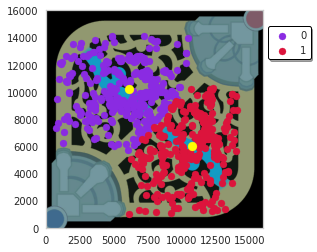

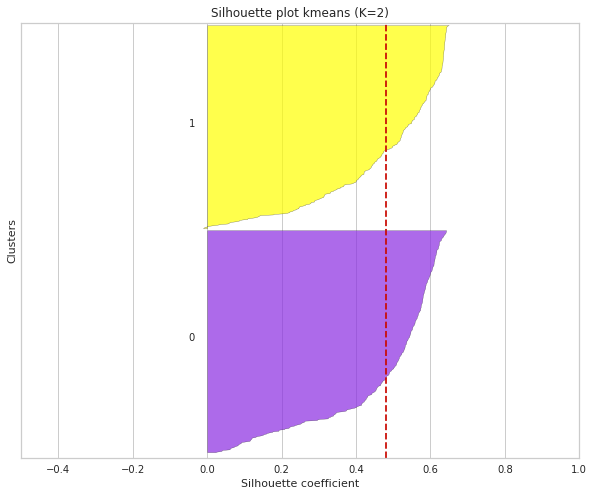

Kmeans silhouette_score 0.48125097742761563
Locations in cluster 0: 395
Locations in cluster 1: 361

--------------------------------------------------------------------------------------


In [39]:
n = 1
npoints = []
scores = []
bb = []
bt = []

game_df = redTeam_df
print("{}: {} team".format(n, game_df["team"].unique()[0]))
npoints.append(game_df.shape[0])
clustering(game_df, scores, bb, bt)
n += 1

In [40]:
mean = np.mean(np.array(scores))
avPoints = np.mean(np.array(npoints))
avBb = np.sum(np.array(bb))
avBt = np.sum(np.array(bt))
print("When Red team Wins:")
print(" - Average silhouette score: ", mean)
print(" - Average points: ", avPoints)
print(" - Average points on the red team's jungle: ", avBb)
print(" - Average points on the blue team's jungle: ", avBt)

When Red team Wins:
 - Average silhouette score:  0.48125097742761563
 - Average points:  756.0
 - Average points on the red team's jungle:  395
 - Average points on the blue team's jungle:  361
